In [60]:
import numpy as np
from scipy.fftpack import fft
import random

/usr/local/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


<class 'numpy.ndarray'> <class 'int'>


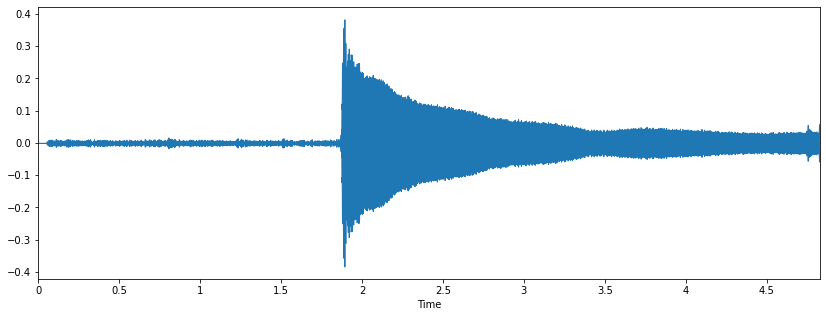

In [83]:
import librosa
#audio_path = '/home/brash/Phys421/JupyterNotebooks/GuitarSamples/LowE.mp4'
#start_time = 2.18

#audio_path = '/home/brash/Phys421/JupyterNotebooks/GuitarSamples/MidE.mp4'
#start_time = 2.38

audio_path = '/home/brash/Phys421/JupyterNotebooks/GuitarSamples/HighE.mp4'
start_time = 1.88

x , sr = librosa.load(audio_path,sr=None)
print(type(x), type(sr))

import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))

librosa.display.waveplot(x, sr=sr)

/usr/local/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


Text(0.5, 1.0, 'Monophonic')

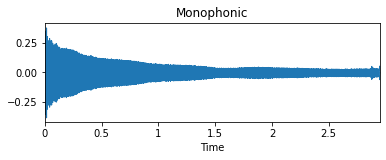

In [84]:
y, sr = librosa.load(audio_path, offset=start_time,duration=3.20,sr=None)

plt.figure()
plt.subplot(2, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title('Monophonic')

In [85]:
sp = np.fft.fft(y)
dt = 1.0/sr
nframes = len(y)
f = []
t = []
power = []
for i in range(int(len(y)/2)):
    t.append(i*dt)
    f.append(i/(nframes*dt))
    power.append(sp.real[i]**2+sp.imag[i]**2)
t = np.array(t)
f = np.array(f)
power = np.array(power)

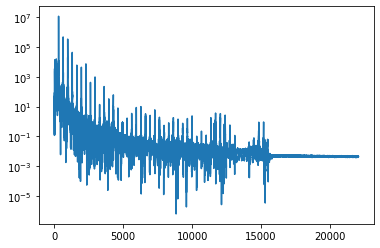

In [86]:
plt.yscale("log")
#plt.xscale("log")
plt.plot(f, power)

(0.0, 22049.830494142247)

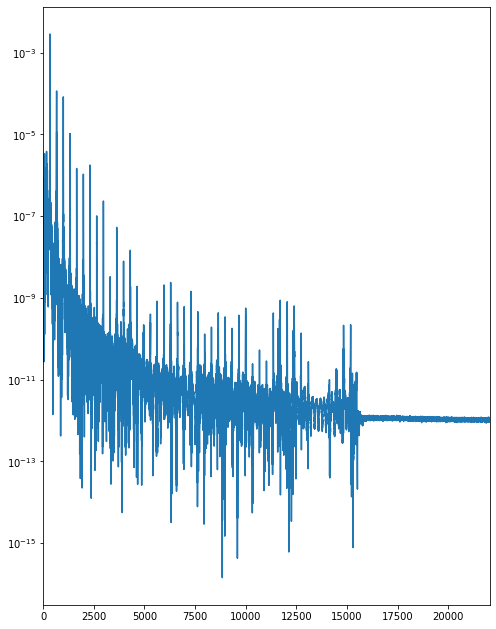

In [87]:
N_fft = len(y)
yfft = fft(y)
yfftReal =2.0/N_fft*yfft.real
yfftImag = 2.0/N_fft*yfft.imag
powerfft = 4.0/N_fft**2*abs(yfft)**2

dt = 1.0/sr
f = [i/(N_fft*dt) for i in range(0,N_fft)]


fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,11)) 
plt.yscale("log")
axs2.plot(f,powerfft)
axs2.set_xlim(0,np.max(f)/2)

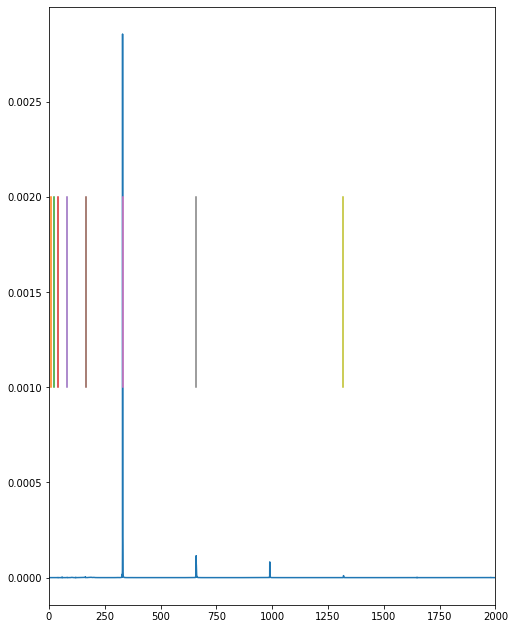

In [89]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,11)) 
plt.yscale("linear")
axs2.plot(f,powerfft)
axs2.set_xlim(0,2000)

efreq = [10.301,20.602,41.203,82.407,164.814,329.628,659.255,1318.51,2637.02,5274.041,10548.082,21096.164]

for i in range(len(efreq)):
    vliney = []
    vlinex = []
    vlinex.append(efreq[i])
    vliney.append(0.001)
    vlinex.append(efreq[i])
    vliney.append(0.002)
    axs2.plot(vlinex,vliney)
